# Introduction

The notebook is intended to provide an example on how to train a Convolutional Neural Network with TensorFlow.

In [1]:
# Import Standard Libraries
import os
import urllib.request
import zipfile

from pathlib import Path

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import Accuracy

# Suppress warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

2023-06-18 16:47:47.959812: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Read Data

## Download Data

In [2]:
# Define the url
cats_dogs_data_url = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

# Define the destination folder
cats_dogs_zip_file_path = Path(os.path.abspath('')).parents[1] / 'data' / 'cats_and_dogs_images' / 'cats_and_dogs.zip'

In [3]:
# Check if data already exists
if not cats_dogs_zip_file_path.exists():

    # Download data
    urllib.request.urlretrieve(cats_dogs_data_url, cats_dogs_zip_file_path)

    # Create a ZipFile object for extracting the data
    cats_dogs_zip_file = zipfile.ZipFile(cats_dogs_zip_file_path, 'r')

    # Extract the data
    cats_dogs_zip_file.extractall(cats_dogs_zip_file_path.parents[0].as_posix())

    # Close stream
    cats_dogs_zip_file.close()

## Define the Data Paths

In [4]:
# Define train and validation paths
train_dir = cats_dogs_zip_file_path.parents[0] / 'cats_and_dogs_filtered' / 'train'
validation_dir = cats_dogs_zip_file_path.parents[0] / 'cats_and_dogs_filtered' / 'validation'

# Define train paths
cats_train_dir = train_dir / 'cats'
dogs_train_dir = train_dir / 'dogs'

# Define validation paths
cats_validation_dir = validation_dir / 'cats'
dogs_validation_dir = validation_dir / 'dogs'

In [5]:
# Retrieve image names
cats_train_files = os.listdir(cats_train_dir)
dogs_train_files = os.listdir(dogs_train_dir)

print('Image names:')
print(cats_train_files[:10])
print(dogs_train_files[:10])

Image names:
['cat.952.jpg', 'cat.946.jpg', 'cat.6.jpg', 'cat.749.jpg', 'cat.991.jpg', 'cat.985.jpg', 'cat.775.jpg', 'cat.761.jpg', 'cat.588.jpg', 'cat.239.jpg']
['dog.775.jpg', 'dog.761.jpg', 'dog.991.jpg', 'dog.749.jpg', 'dog.985.jpg', 'dog.952.jpg', 'dog.946.jpg', 'dog.211.jpg', 'dog.577.jpg', 'dog.563.jpg']


In [6]:
print('Total training cat images: ', len(os.listdir(cats_train_dir)))
print('Total training dog images: ', len(os.listdir(dogs_train_dir)))

print('Total validation cat images: ', len(os.listdir(cats_validation_dir)))
print('Total validation dog images: ', len(os.listdir(dogs_validation_dir)))

Total training cat images:  1000
Total training dog images:  1000
Total validation cat images:  500
Total validation dog images:  500


## Define Image Data Generator

In [37]:
# Define the Image Data Generator with Data Augmentation for the Training set
train_data_generator = ImageDataGenerator(rescale=1.0/255,
                                          rotation_range=40,
                                          width_shift_range=0.2,
                                          height_shift_range=0.2,
                                          shear_range=0.2,
                                          zoom_range=0.2,
                                          horizontal_flip=True,
                                          fill_mode='nearest')

validation_data_generator = ImageDataGenerator(rescale=1.0/255)

# Define the DirectoryIterator objects
train_directory_iterator = train_data_generator.flow_from_directory('/Users/s.porreca/Projects/cheat_sheets/data/cats_and_dogs_images/cats_and_dogs_filtered/train',
                                                                    batch_size=20,
                                                                    class_mode='binary',
                                                                    target_size=(150, 150))     

validation_directory_iterator =  validation_data_generator.flow_from_directory('/Users/s.porreca/Projects/cheat_sheets/data/cats_and_dogs_images/cats_and_dogs_filtered/validation',
                                                                               batch_size=20,
                                                                               class_mode='binary',
                                                                               target_size=(150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Download InceptionV3 Weights

In [ ]:
Path(os.path.abspath('')).parents[1

In [ ]:
# Define the url
inception_v3_weights_url = 'https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

# Define the destination folder
inception_v3_weights_file_path = Path(os.path.abspath('')).parents[1] / 'data' / 'cats_and_dogs_images' / 'cats_and_dogs.zip'

In [ ]:
# Check if data already exists
if not cats_dogs_zip_file_path.exists():

    # Download data
    urllib.request.urlretrieve(cats_dogs_data_url, cats_dogs_zip_file_path)

    # Create a ZipFile object for extracting the data
    cats_dogs_zip_file = zipfile.ZipFile(cats_dogs_zip_file_path, 'r')

    # Extract the data
    cats_dogs_zip_file.extractall(cats_dogs_zip_file_path.parents[0].as_posix())

    # Close stream
    cats_dogs_zip_file.close()

# Exploratory Data Analysis (EDA)

## Plot Image Samples

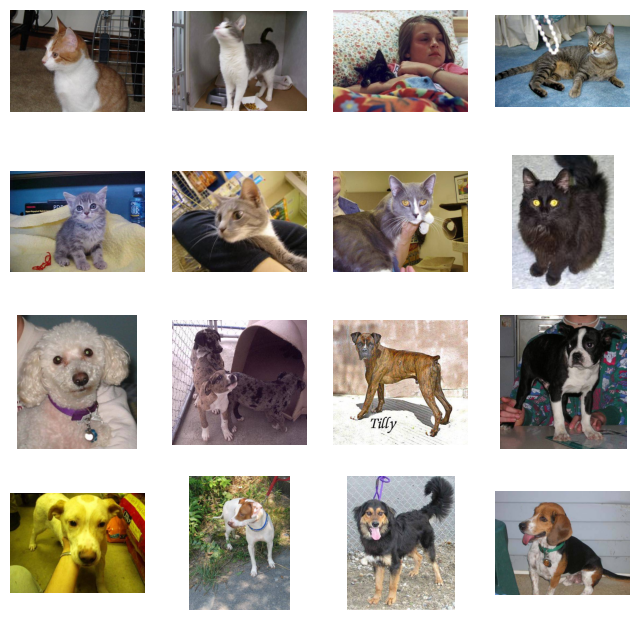

In [21]:
# Define grid of images to display
rows = 4
cols = 4

# Initialise index of images to display
image_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(cols*2, rows*2)

# Define the number of images to display per class
image_index+=8

next_cat_image = [os.path.join(cats_train_dir, file) for file in cats_train_files[image_index-8:image_index]]

next_dog_image = [os.path.join(dogs_train_dir, file) for file in dogs_train_files[ image_index-8:image_index]]

# Fetch the images to display
for index, image_path in enumerate(next_cat_image+next_dog_image):
    
    # Define subplot
    subplot = plt.subplot(rows, cols, index + 1)
    
    # Hide axis
    subplot.axis('Off') 

    # Read image
    image = mpimg.imread(image_path)

    # Display image
    plt.imshow(image)

plt.show()

# Modeling

## Neural Network Architecture

In [22]:
# Define the Convolutional Neural Network Architecture
model = tf.keras.models.Sequential([
    # Images are of shape (150, 150, 3)
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3), name='conv2d_1'),
    tf.keras.layers.MaxPooling2D(2, 2, name='max_pooling2d_1'),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', name='conv2d_2'),
    tf.keras.layers.MaxPooling2D(2, 2, name='max_pooling2d_2'), 
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', name='conv2d_3'), 
    tf.keras.layers.MaxPooling2D(2, 2, name='max_pooling2d_3'),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(name='flatten_1'), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu', name='dnn_1'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid', name='dnn_2')  
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 17, 17, 64)       0

## Compile

In [25]:
# Compile the model
model.compile(optimizer=RMSprop(learning_rate=0.001), loss=BinaryCrossentropy(), metrics=['accuracy'])

## Training

In [38]:
# Fit the model
history = model.fit(train_directory_iterator, 
                    validation_data=validation_directory_iterator, 
                    steps_per_epoch=100, 
                    epochs=15, 
                    validation_steps=50, 
                    verbose=2)

Epoch 1/15


2023-06-18 15:53:16.571382: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-06-18 15:53:35.867555: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


100/100 - 23s - loss: 0.7916 - accuracy: 0.6425 - val_loss: 0.7181 - val_accuracy: 0.6190 - 23s/epoch - 225ms/step
Epoch 2/15
100/100 - 22s - loss: 0.6159 - accuracy: 0.6735 - val_loss: 0.5475 - val_accuracy: 0.7130 - 22s/epoch - 216ms/step
Epoch 3/15
100/100 - 20s - loss: 0.6092 - accuracy: 0.6700 - val_loss: 0.5610 - val_accuracy: 0.7180 - 20s/epoch - 204ms/step
Epoch 4/15
100/100 - 20s - loss: 0.5892 - accuracy: 0.6945 - val_loss: 0.5432 - val_accuracy: 0.7200 - 20s/epoch - 198ms/step
Epoch 5/15
100/100 - 20s - loss: 0.5805 - accuracy: 0.7015 - val_loss: 0.5235 - val_accuracy: 0.7290 - 20s/epoch - 199ms/step
Epoch 6/15
100/100 - 20s - loss: 0.5834 - accuracy: 0.6920 - val_loss: 0.5131 - val_accuracy: 0.7570 - 20s/epoch - 198ms/step
Epoch 7/15
100/100 - 20s - loss: 0.5595 - accuracy: 0.7130 - val_loss: 0.4991 - val_accuracy: 0.7430 - 20s/epoch - 201ms/step
Epoch 8/15
100/100 - 20s - loss: 0.5586 - accuracy: 0.7150 - val_loss: 0.5227 - val_accuracy: 0.7380 - 20s/epoch - 195ms/step
Epo

# Model Evaluation

## History

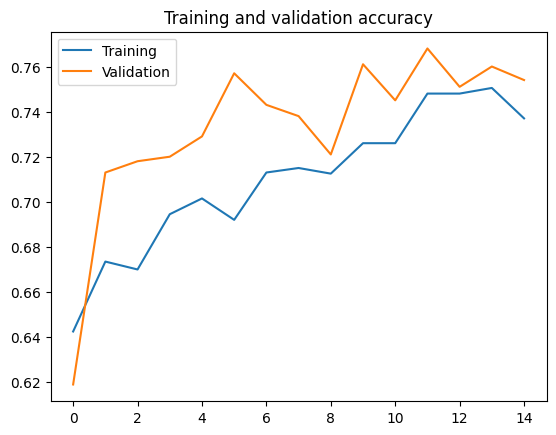

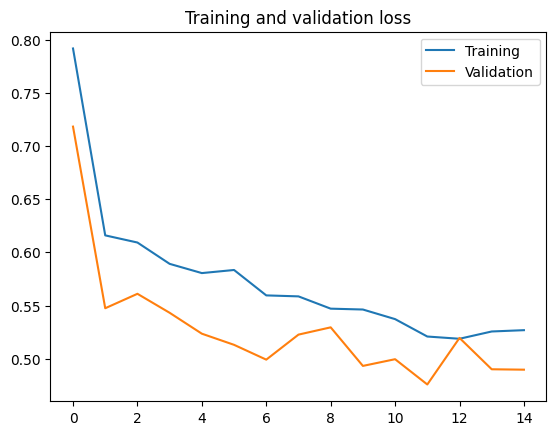

In [40]:
# Retrieve loss & accuracy
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
training_loss= history.history['loss']
validation_loss = history.history['val_loss']

# Compute the number of epochs
epochs= range(len(training_accuracy))

# Plot the Accuracy
plt.plot(epochs, training_accuracy, label='Training')
plt.plot(epochs, validation_accuracy, label='Validation')
plt.title('Training and validation accuracy')

plt.legend()

plt.figure()

# Plot the Loss
plt.plot(epochs, training_loss, label='Training')
plt.plot(epochs, validation_loss, label='Validation')
plt.title('Training and validation loss')

plt.legend()

plt.show()

The model is clearly overfitting. The validation accuracy does not improve and the loss increases.